In [316]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind, ttest_ind_from_stats, f_oneway
from scipy.special import stdtr
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [163]:
##load train data
raw_train = pd.read_csv('train.csv')
df=raw_train.copy()

In [ ]:
from math import log
df['SalePrice']=[log(x) for x in df.SalePrice]

In [259]:
#This funtion plot the relationshipn between y and other variables. Float, int, or str use different types of plots
from Individual_Variables_Analysis import summary_indetail as summ
def plot_saleprice_vars(df,range_index, y_min, y_max):
    plt.close('all')
    try:
        for i in range_index:
            if type(df.iloc[:,i].dropna().values[0]) is np.float64:
                data=pd.concat([df.SalePrice, df.iloc[:,i]], axis=1)
                plt.figure(i+1)
                data.plot.scatter(x=df.columns[i], y="SalePrice", ylim=(y_min,y_max))
                plt.title("Number of NAs is %i" % (1460-summ(df).loc[summ(df).name==df.columns[i]].num_not_NAs))
            else:
                if type(df.iloc[:,i].dropna().values[0]) is np.int64:
                    data=pd.concat([df.SalePrice, df.iloc[:,i]], axis=1)
                    plt.figure(i+1)
                    data.plot.scatter(x=df.columns[i], y="SalePrice", ylim=(y_min,y_max))
                    plt.title("Number of NAs is %i" % (1460-summ(df).loc[summ(df).name==df.columns[i]].num_not_NAs))
                else:
                    data=pd.concat([df.SalePrice, df.iloc[:,i]], axis=1)
                    plt.figure(i+1)
                    sns.boxplot(x=df.columns[i], y='SalePrice', data=data)
                    plt.title("Number of NAs is %i" % (1460-summ(df).loc[summ(df).name==df.columns[i]].num_not_NAs))
        plt.show()
    except:
        print("Error: index out of range")

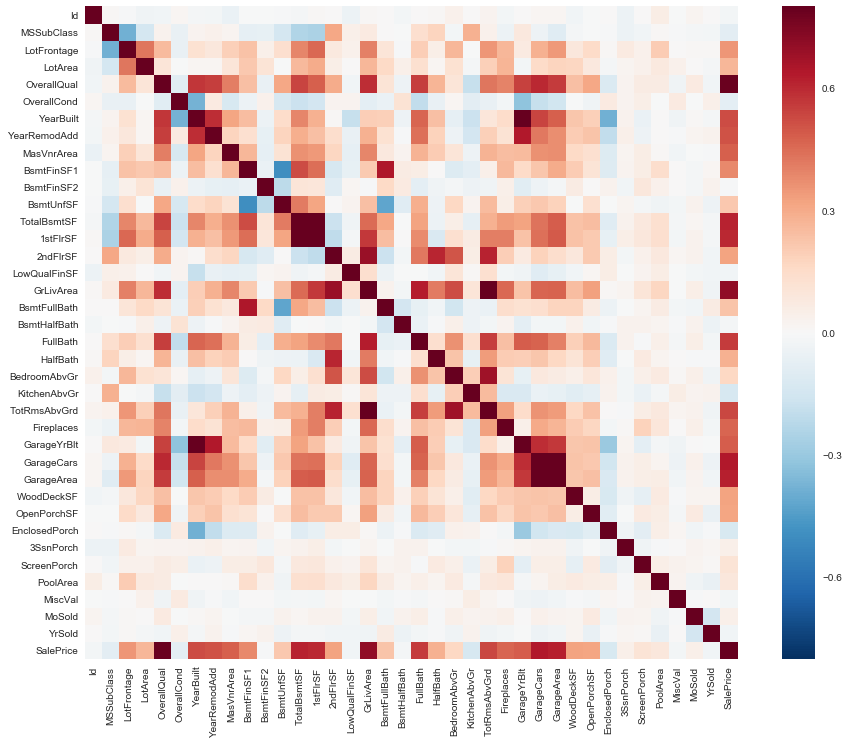

In [122]:
corrmap = df.corr()
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corrmap, vmax=0.8, square=True)

In [ ]:
##from the bottom line in this heatmap. 'OverallQual','GrLiveArea', 'GarageArea', 

In [129]:
pd.set_option('display.max_rows', 100)

In [148]:
def plot_LotFrontage_vars(df,range_index):
    plt.close('all')
    try:
        for i in range_index:
            if type(df.iloc[:,i].dropna().values[0]) is np.float64:
                data=pd.concat([df.LotFrontage, df.iloc[:,i]], axis=1)
                plt.figure(i+1)
                data.plot.scatter(x=df.columns[i], y="LotFrontage", ylim=(0,200))
                plt.title("Number of NAs is %i" % (1460-summ(df).loc[summ(df).name==df.columns[i]].num_not_NAs))
            else:
                if type(df.iloc[:,i].dropna().values[0]) is np.int64:
                    data=pd.concat([df.LotFrontage, df.iloc[:,i]], axis=1)
                    plt.figure(i+1)
                    data.plot.scatter(x=df.columns[i], y="LotFrontage", ylim=(0,200))
                    plt.title("Number of NAs is %i" % (1460-summ(df).loc[summ(df).name==df.columns[i]].num_not_NAs))
                else:
                    data=pd.concat([df.LotFrontage, df.iloc[:,i]], axis=1)
                    plt.figure(i+1)
                    sns.boxplot(x=df.columns[i], y='LotFrontage', data=data)
                    plt.title("Number of NAs is %i" % (1460-summ(df).loc[summ(df).name==df.columns[i]].num_not_NAs))
        plt.show()
    except:
        print("Error: index out of range")

In [157]:
#plot_LotFrontage_vars(df, range(81))

In [158]:
# df.loc[df.LotFrontage.isnull()].hist(bins=50, figsize=(30,40))
# plt.show()

In [ ]:
###This function could also be imported from preprocess module
def summary_indetail(df):
    summ = pd.DataFrame(df.columns, columns=['name'])
    summ['type'] = [type(df[col][df[col].first_valid_index()]) for col in df.columns]
    summ['num_not_NAs'] = [df[col].dropna().shape[0] for col in df.columns]
    summ['num_dupl'] = [df[col].dropna().nunique() for col in df.columns]
    summ['ratio_NAs'] = [(1460-x)/1460 for x in summ['num_not_NAs']]
    return summ

In [ ]:
#This function could also be imported from preprocess module
def plot_individual_columns(df,range_col):
    try:
        for i in range_col:
            serie = df.iloc[:,i]
            ##There are three classes for all the columns: float, integer, and str
            if type(df.iloc[:,i].dropna().values[0]) is np.float64:
                plt.figure(i)
                sns.distplot(df.iloc[:,i].dropna(), label=('%s' %(df.columns[i])))
            else:
                if type(df.iloc[:,i].dropna().values[0]) is np.int64:
                    plt.figure(i)
                    plt.hist(df.iloc[:,i])
                    plt.xlabel('%s' %(df.columns[i]))
                else:
                    ##The category columns are not plotted. 
                    pass
            plt.show()
    except IndexError:
        print("Error: The index selected is out of the range")

In [ ]:
##The ANOVA test of Month Sold showed p-value of 0.48. Thus, this column could be dropped
i=1
m_1=df.loc[df['MoSold'] == i,].SalePrice
m_2=df.loc[df['MoSold'] == (i+1),].SalePrice
m_3=df.loc[df['MoSold'] == (i+2),].SalePrice
m_4=df.loc[df['MoSold'] == (i+3),].SalePrice
m_5=df.loc[df['MoSold'] == (i+4),].SalePrice
m_6=df.loc[df['MoSold'] == (i+5),].SalePrice
m_7=df.loc[df['MoSold'] == (i+6),].SalePrice
m_8=df.loc[df['MoSold'] == (i+7),].SalePrice
m_9=df.loc[df['MoSold'] == (i+8),].SalePrice
m_10=df.loc[df['MoSold'] == (i+9),].SalePrice
m_11=df.loc[df['MoSold'] == (i+10),].SalePrice
m_12=df.loc[df['MoSold'] == (i+11),].SalePrice
f_, p_ = f_oneway(m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12)
p_

In [ ]:
##Year_built feature showed linearity with price after 1945. thus could set before 1945 as 0, 1946 as 1, 1947 as 2
## and so on
plt.figure(1)
plt.scatter(df.groupby('YearBuilt').SalePrice.mean().index,df.groupby('YearBuilt').SalePrice.mean().values)
plt.xlabel('year built')
plt.ylabel('mean SalePrice')
plt.figure(2)
plt.scatter(df.groupby('YearBuilt').count()['Id'].index, df.groupby('YearBuilt').count()['Id'].values)
plt.xlabel('year built')
plt.ylabel('count')
plt.figure(3)
plt.scatter(df.YearBuilt, df.SalePrice)
plt.xlabel('year built')
plt.ylabel('Price')
plt.show()

In [ ]:
###MSSubClass Important feature, contain too much information, Share info with HouseType, Year_built
#Type of Int64 make no sense. Should change to category
#Should split into different features and combine with others
plt.figure(1)
plt.scatter(df.groupby('MSSubClass').SalePrice.mean().index,df.groupby('MSSubClass').SalePrice.mean().values)
plt.xlabel('MSSubClass')
plt.ylabel('mean SalePrice')
plt.figure(2)
plt.scatter(df.groupby('MSSubClass').count()['Id'].index, df.groupby('MSSubClass').count()['Id'].values)
plt.xlabel('MSSubClass')
plt.ylabel('count')
plt.figure(3)
plt.scatter(df.MSSubClass, df.SalePrice)
plt.xlabel('MSSubClass')
plt.ylabel('Price')
plt.show()

In [ ]:
##YearSold, plots and ANOVA test. plot showed slightly difference
#but ANOVA Testshowed no significant difference, thus drop Year_Sold
plt.figure(1)
plt.scatter(df.groupby('YrSold').SalePrice.mean().index,df.groupby('YrSold').SalePrice.mean().values)
plt.xlabel('YrSold')
plt.ylabel('mean SalePrice')
plt.figure(2)
plt.scatter(df.groupby('YrSold').count()['Id'].index, df.groupby('YrSold').count()['Id'].values)
plt.xlabel('YrSold')
plt.ylabel('count')
plt.figure(3)
plt.scatter(df.YrSold, df.SalePrice)
plt.xlabel('YrSold')
plt.ylabel('Price')
plt.show()
#ANOVA test showed no significant difference, thus drop Year_Sold
f_2006 = df.loc[df['YrSold']==2006,:].SalePrice
f_2007 = df.loc[df['YrSold']==2007,:].SalePrice
f_2008 = df.loc[df['YrSold']==2008,:].SalePrice
f_2009 = df.loc[df['YrSold']==2009,:].SalePrice
f_2010 = df.loc[df['YrSold']==2010,:].SalePrice
f_, p_ = f_oneway(f_2006, f_2007, f_2008, f_2009, f_2010)
print('ANOVA test: p-value is %f' %p_)

In [ ]:
#YearRemodAdd Analysis
#substract YearRemodAdd by 1950 since all the value is larger or equal 1950. and drop YearBuilt,
#since if no RemodAdd, it is same with the YearBuilt
plt.figure(1)
plt.scatter(df.groupby('YearRemodAdd').SalePrice.mean().index,df.groupby('YearRemodAdd').SalePrice.mean().values)
plt.xlabel('YearRemodAdd')
plt.ylabel('mean SalePrice')
plt.figure(2)
plt.scatter(df.groupby('YearRemodAdd').count()['Id'].index, df.groupby('YearRemodAdd').count()['Id'].values)
plt.xlabel('YearRemodAdd')
plt.ylabel('count')
plt.figure(3)
plt.scatter(df.YearRemodAdd, df.SalePrice)
plt.xlabel('year built')
plt.ylabel('Price')
plt.show()

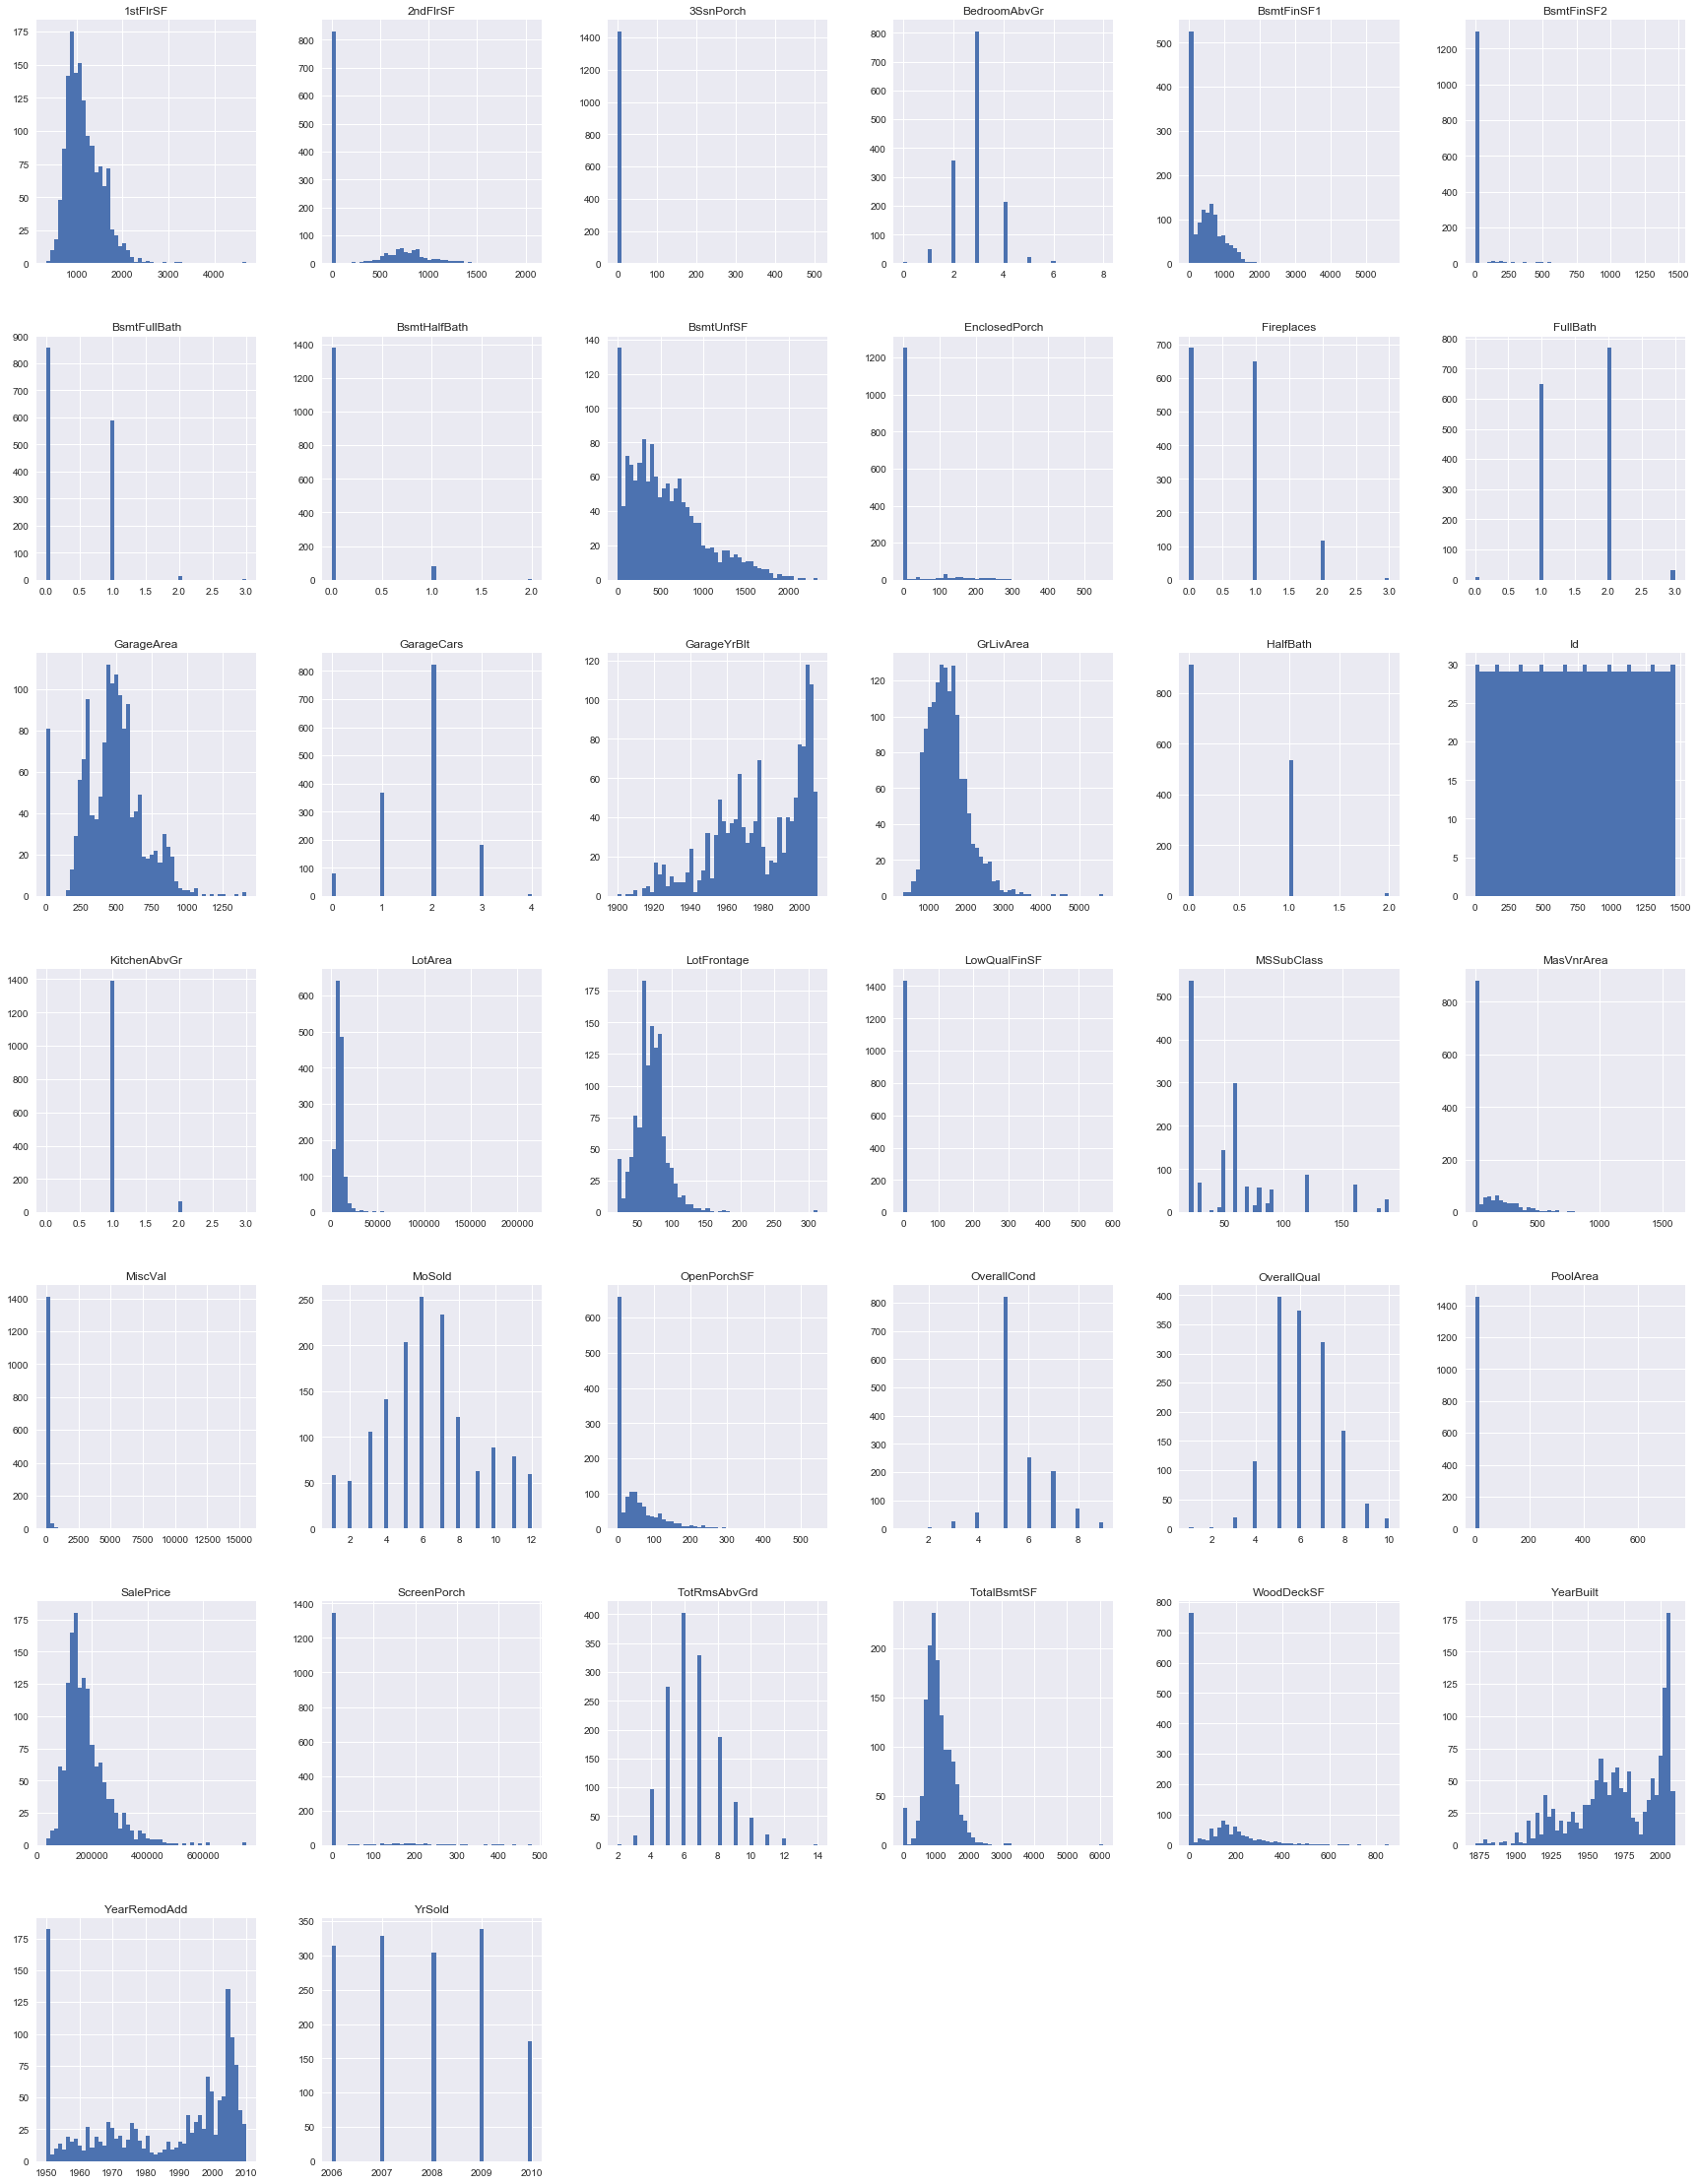

In [159]:
df.hist(bins=50, figsize=(30,40))
plt.show()

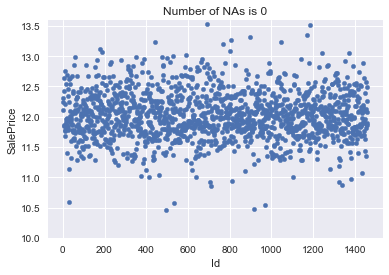

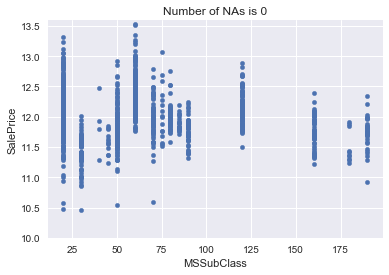

In [260]:
plot_saleprice_vars(df, range(2), 10, log(800000))

In [279]:
###HouseStyle
# plt.figure(1)
# plt.scatter(df.groupby('HouseStyle').SalePrice.mean().index,df.groupby('HouseStyle').SalePrice.mean().values)
# plt.xlabel('HouseStyle')
# plt.ylabel('mean SalePrice')
# plt.figure(2)
# plt.scatter(df.groupby('HouseStyle').count()['Id'].index, df.groupby('HouseStyle').count()['Id'].values)
# plt.xlabel('HouseStyle')
# plt.ylabel('count')
# plt.figure(3)
# plt.boxplot(df.HouseStyle, df.SalePrice)
# plt.xlabel('HouseStyle')
# plt.ylabel('Price')
# plt.show()

In [320]:
df.loc[df.YearRemodAdd != df.YearBuilt,:].head()#.groupby('YearBuilt').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,11.870600
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.634603
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,11.774520


In [323]:
from preprocess import impute_multi_2